<a href="https://colab.research.google.com/github/tayo2910/PROJECTS/blob/main/time_series_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

eSeries Project - Project
An End-to-End Machine Learning Workflow for User Behavioural Forecasting using GA4 data
--
Contributors to this Notebook: Tayo Badewole, Ayo Kehinde Samuel

Results
Assumptions of Time Series Analysis
The data is stationary
the multivariate variables are cointegrated
the durbin watson values are between 1.8 and 2
Expected Results
A forecasting model that predicts the observations of users in behavioural analysis.
historic observations trend
multivariate timeseries

***This notebook solution is divided into 4 Sections, each constituting a *workflow* on its own:***

- Part I: Initial Data Analysis and Preprocessing
- Part II: EDA and Hypothesis testing
- Part III: Modelling Methodology
- Part IV: Predictions and Exporting

Cumulative WORK FLOW
 1. Import libaries and Data
 2. Data inspection
 3. EDA - univariate graphical Exploration and visualization
        Data cleaning
        Data manipulation
        Feature engineering
        Hypothesis testing
 4. Modelling & Forecasting using ARIMA, XgBboost, FB Prophet, SARIMA
 5. Model evaluation[link text](https://)

## Initial Data Analyis and Preprocessing

In [ ]:
#Libraries for descriptive statistics
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('data.csv')
df

,date,users,new_users,average_engagement_time,total_revenue,active_trending_user_30days,active_trending_user_7days,active_trending_user_1day
0,1/1/2023,0,0,0.000000,0,1224,3,0
1,1/2/2023,0,0,0.000000,0,1224,3,0
2,1/3/2023,0,0,0.000000,0,1224,1,0
3,1/4/2023,1,0,0.000000,0,1224,1,1
4,1/5/2023,0,0,0.000000,0,1224,1,0
...,...,...,...,...,...,...,...,...
187,7/7/2023,32,26,83.281250,0,372,152,32
188,7/8/2023,25,24,32.600000,0,386,145,25
189,7/9/2023,45,42,77.933333,0,416,172,45
190,7/10/2023,57,45,170.087719,0,443,208,57


In [ ]:
#I am setting the date as the index of the Dataframe
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 192 entries, 2023-01-01 to 2023-07-11
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   users                        192 non-null    int64  
 1   new_users                    192 non-null    int64  
 2   average_engagement_time      192 non-null    float64
 3   total_revenue                192 non-null    int64  
 4   active_trending_user_30days  192 non-null    int64  
 5   active_trending_user_7days   192 non-null    int64  
 6   active_trending_user_1day    192 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 12.0 KB


In [ ]:
df.describe()

,users,new_users,average_engagement_time,total_revenue,active_trending_user_30days,active_trending_user_7days,active_trending_user_1day
count,192.000000,192.000000,192.000000,192.0,192.000000,192.000000,192.000000
mean,36.145833,32.322917,90.448231,0.0,1025.703125,232.703125,36.145833
std,79.367062,77.292739,177.707678,0.0,996.695525,404.953401,79.367062
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.0,4.000000,0.000000,0.000000
50%,11.500000,7.000000,15.142455,0.0,677.000000,82.500000,11.500000
75%,36.000000,31.000000,99.847144,0.0,1999.750000,267.250000,36.000000
max,688.000000,670.000000,1293.000000,0.0,2893.000000,2067.000000,688.000000


In [ ]:
df.isna().sum()

users                          0
new_users                      0
average_engagement_time        0
total_revenue                  0
active_trending_user_30days    0
active_trending_user_7days     0
active_trending_user_1day      0
dtype: int64

In [ ]:
df.duplicated().sum()

50

## EDA

### Overview
This is the EDA and Feature Engineering component of this solution. The workflow for this notebook is outlined as follows:

  Data cleaning
  Data manipulation
  Feature engineering
  Hypothesis testing(Augmented Dicky-Fuller, Kwiatkowski–Phillips–Schmidt–Shin)


### Stationarity check for time series: Augmented Dicky-Fuller Test
Null Hypothesis (H0): the time series is not stationary (i.e. it can be represented by a unit root)

Alternate Hypotheis (H1): the time series is stationary (i.e. it can not be represented by a unit root).
#### Null Hypothesis is rejected.####
The result will be interpreted using the p-value. A p-value below a threshold (here 0.05) means I will reject the H0 and a p-value above it means I accept the H0.

## Visualizing the data

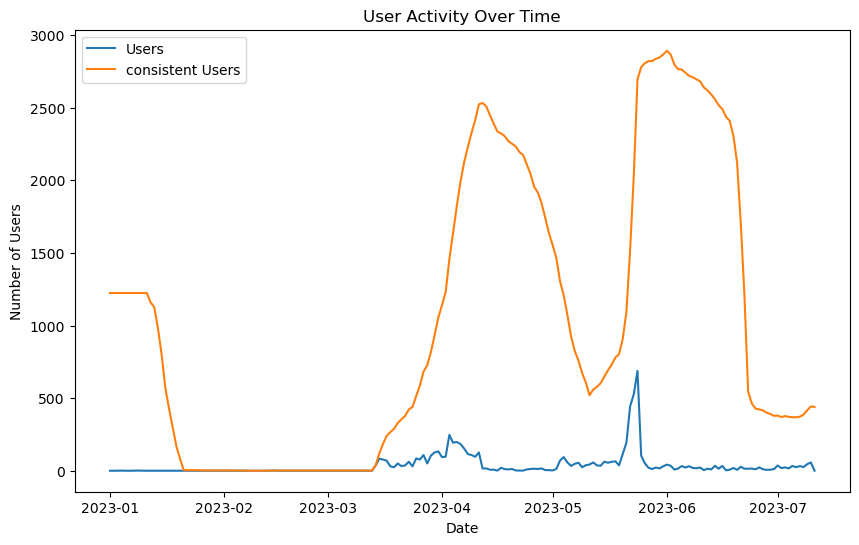

In [ ]:
# Importing libraries

import matplotlib.pyplot as plt

#plotting a representation of the user activity from January to July
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['users'], label='Users')
plt.plot(df.index, df['active_trending_user_30days'], label='consistent Users')
# I will rather make comparisons between these two groups.
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('User Activity Over Time')
plt.legend()
plt.show()

### The pattern is not quite clear in the above plot. There was no engagement by the users up until close to the middle of March 2023, but the active trending users for 30 days were active from the beginning. Afterwards, the number stabilized just as with the users but started rising and falling.  However, in mid June 2023, the active trending users reached their largest peak in the number of users on the website, after which the sporadic fall happened and it stabilized.

### This suggests that the time series might be stationary.

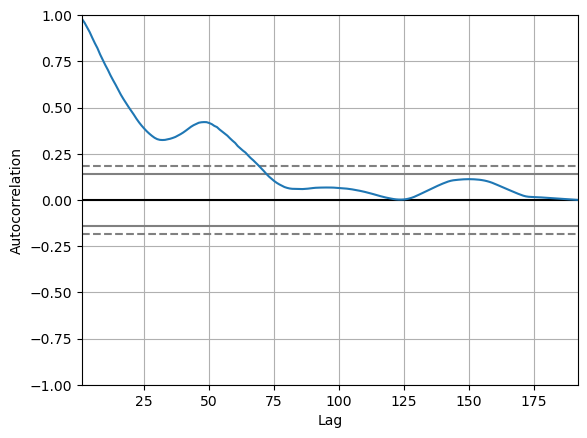

In [ ]:
 '''Trying to plot an autocorrelation plot to check the degree of similarity
and check for randomness'''

#Importing libraries
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()

### All the coefficients are close to 0, and there seems to be no significant seasonal patterns as there are spikes at irregular intervals. However, there seems to be a decrease in correllation with the way the line wavily tends to zero. That might suggest that distant past values have very low influence on current values

# Part III: Modelling Methodology
Overview

This is the Machine Learning component of this solution and we will be using the ARIMA modelling.

## Modeling and making predictions for future time frames

C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\User\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


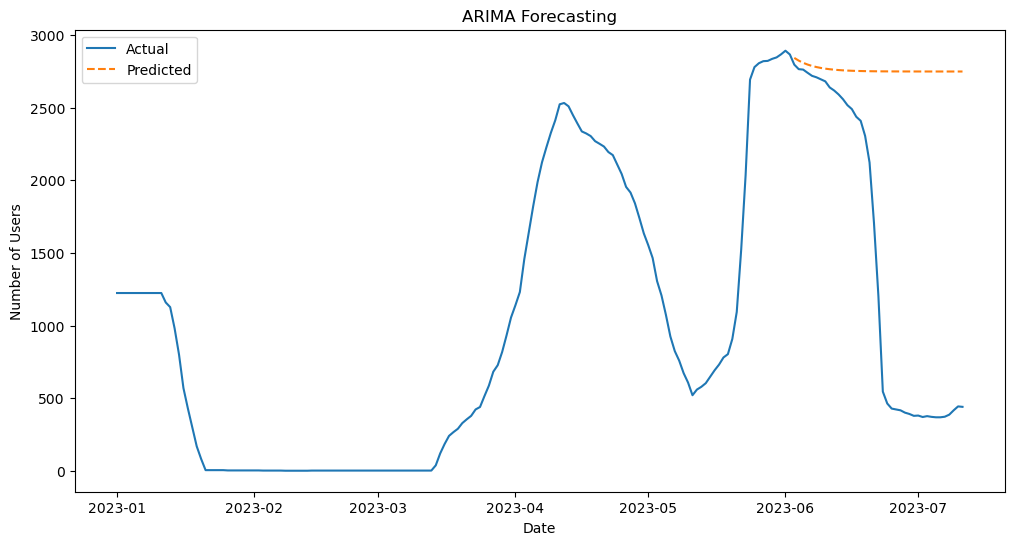

In [ ]:
#Importing Libraries

from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

# Fit ARIMA model
model = ARIMA(train['active_trending_user_30days'], order=(1, 1, 1))
results = model.fit()

# Make predictions on the test set
predictions = results.forecast(steps=len(test))

# Plot the actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['active_trending_user_30days'], label='Actual')
plt.plot(test.index, predictions, label='Predicted', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()


In [ ]:
# summary of fit model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                    SARIMAX Results                                    
=======================================================================================
Dep. Variable:     active_trending_user_30days   No. Observations:                  153
Model:                          ARIMA(1, 1, 1)   Log Likelihood                -834.321
Date:                         Fri, 04 Aug 2023   AIC                           1674.641
Time:                                 16:12:55   BIC                           1683.713
Sample:                             01-01-2023   HQIC                          1678.326
                                  - 06-02-2023                                         
Covariance Type:                           opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7998      0.052     15.332      0.000       0.698       0.902
ma.L1          0.0573      0.133      0.430      0.668      -0.204       0.319
sigma2      3403.8817    132.852     25.622      0.000    3143.496    3664.267
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):              4961.11
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):              11.40   Skew:                            -1.86
Prob(H) (two-sided):                  0.00   Kurtosis:                        30.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### The p-value of the (p, d, q parameters) is reported as 0.00, which suggests that the test found strong evidence to reject the null hypothesis of constant variance in the residuals. It suggests that the variance of the residuals is not constant, and there may be patterns of changing variability in the data.

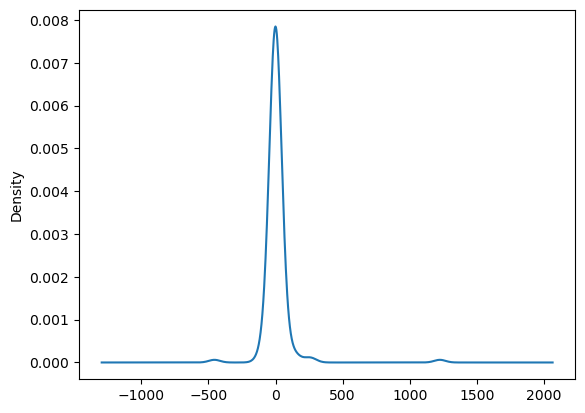

count     153.000000
mean        9.822052
std       114.734029
min      -454.839608
25%        -6.694910
50%         0.000000
75%         8.466809
max      1224.000000
dtype: float64


In [ ]:
residuals = results.resid
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

### We have a density plot of the residual error values, suggesting the errors are normally distributed, but may not be centered on zero.